# New Final Project notebook - Upwelling index (BEUTI)

## Jelly data

In [35]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
# import cmocean.cm as cmo
# from scipy.interpolate import griddata
# import glidertools as gt
from scipy import stats
from SJ_tools import final_proj_functions as fpf
from matplotlib import mlab

Read in the jellyfish abundance data

In [2]:
file_path = '/Users/sarah/Documents/MLML/Current_classes/MS263-Data_Analysis/Final_project/data/MS263 jelly data.csv'
jellydf = pd.read_csv(file_path,header=1)

In [3]:
jellydf

,year,genus,region,abundance
0,1990,Chrysaora CA,central CA,0.247798
1,1991,Chrysaora CA,central CA,0.282914
2,1992,Chrysaora CA,central CA,1.382158
3,1993,Chrysaora CA,central CA,0.531131
4,1994,Chrysaora CA,central CA,0.468061
...,...,...,...,...
83,2012,Chrysaora PNW,PNW,7.425420
84,2013,Chrysaora PNW,PNW,8.488680
85,2014,Chrysaora PNW,PNW,7.848780
86,2015,Chrysaora PNW,PNW,0.266031


In [4]:
# subset the data
chrysaora_ca = jellydf[(jellydf['genus'] == 'Chrysaora CA')& (jellydf['region'] == 'central CA')]
chrysaora_pnw = jellydf[(jellydf['genus'] == 'Chrysaora PNW') & (jellydf['region'] == 'PNW')]
aurelia = jellydf[(jellydf['genus'] == 'Aurelia')]
aequorea = jellydf[(jellydf['genus'] == 'Aequorea')]

Calculate time series trend lines

In [5]:
#chrysaora_ca trend line
p = np.polyfit(chrysaora_ca['year'], chrysaora_ca['abundance'], 1)
slope = p[0]
intercept = p[1]
chry_bestfit = slope * chrysaora_ca['year'] + intercept
# chry_bestfit
print(slope)

-0.005468419531624213


In [6]:
#chrysaora_pnw trend line
p = np.polyfit(chrysaora_pnw['year'], chrysaora_pnw['abundance'], 1)
chry_pnw_slope = p[0]
chry_pnw_intercept = p[1]
chry_pnw_bestfit = chry_pnw_slope * chrysaora_pnw['year'] + chry_pnw_intercept
# chry_bestfit
print(chry_pnw_slope)

-0.16349746054694259


In [7]:
# aequorea trend line
aq_p = np.polyfit(aequorea['year'], aequorea['abundance'], 1)
aq_slope = aq_p[0]
aq_intercept = aq_p[1]
aequo_bestfit = aq_slope * aequorea['year'] + aq_intercept
print(aq_slope)

-0.023060338463370522


In [8]:
# aurelia trend line
aur_p = np.polyfit(aurelia['year'], aurelia['abundance'], 1)
aur_slope = aur_p[0]
aur_intercept = aur_p[1]
aurelia_bestfit = aur_slope * aurelia['year'] + aur_intercept
print(aur_slope)

0.000182606998290419


Plot the time series

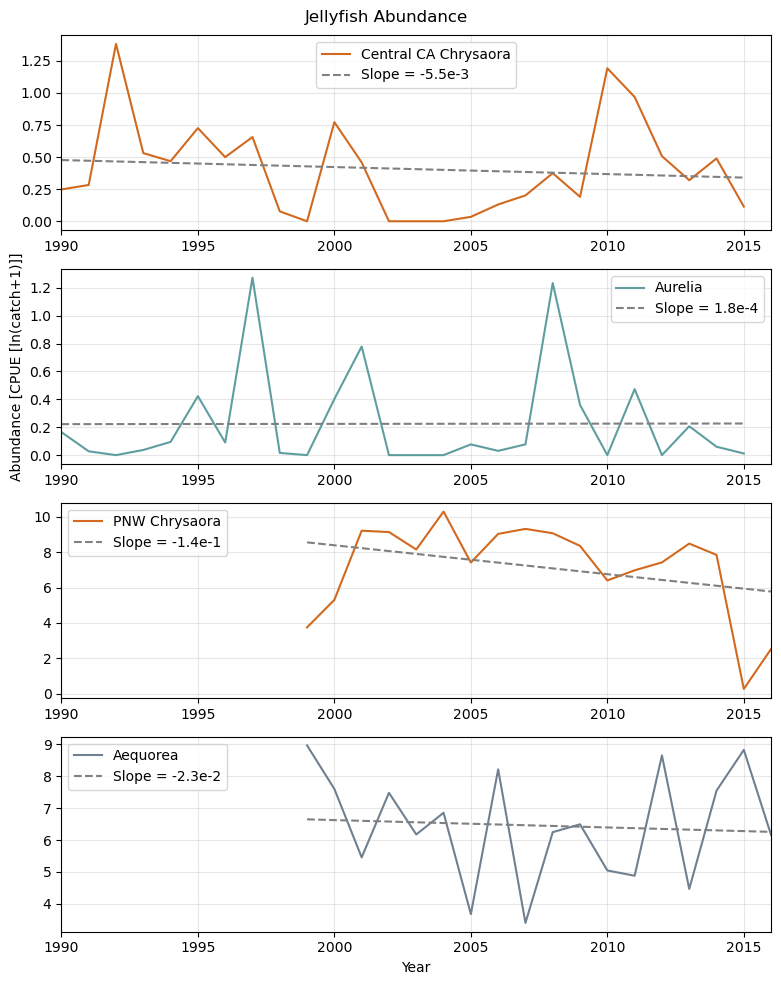

In [9]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))

#ca chrysaora
axes[0].plot(chrysaora_ca['year'], chrysaora_ca['abundance'], 'chocolate', label='Central CA Chrysaora')
axes[0].plot(chrysaora_ca['year'], chry_bestfit, 'grey', linestyle='--', label='Slope = -5.5e-3')
axes[0].set_xlim([1990, 2016])

#aurelia
axes[1].plot(aurelia['year'], aurelia['abundance'], 'cadetblue', label='Aurelia')
axes[1].plot(aurelia['year'], aurelia_bestfit, 'grey', linestyle='--', label='Slope = 1.8e-4')
axes[1].set_xlim([1990, 2016])

# pnw chrysaora
axes[2].plot(chrysaora_pnw['year'], chrysaora_pnw['abundance'], 'chocolate', label='PNW Chrysaora')
axes[2].plot(chrysaora_pnw['year'], chry_pnw_bestfit, 'grey', linestyle='--', label='Slope = -1.4e-1')
axes[2].set_xlim([1990, 2016])

# aequorea
axes[3].plot(aequorea['year'], aequorea['abundance'], 'slategray', label='Aequorea')
axes[3].plot(aequorea['year'], aequo_bestfit, 'grey', linestyle='--', label='Slope = -2.3e-2')
axes[3].set_xlim([1990, 2016])

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')
axes[3].legend(loc='best')

axes[0].grid(alpha=0.3)
axes[1].grid(alpha=0.3)
axes[2].grid(alpha=0.3)
axes[3].grid(alpha=0.3)

fig.suptitle('Jellyfish Abundance')
plt.xlabel('Year')
axes[1].set_ylabel('Abundance [CPUE [ln(catch+1)]]')

plt.tight_layout()
plt.show()

Calculate relative genus abundance for central CA

In [10]:
central_ca = jellydf[jellydf['region'] == 'central CA']
pnw = jellydf[jellydf['region'] == 'PNW']

In [11]:
richness = 2
N_ca = np.sum(central_ca['abundance']) #total biomass of both genera
ni_chry_ca = np.sum(chrysaora_ca['abundance']) #total biomass of target genus
ni_aurelia = np.sum(aurelia['abundance'])

In [12]:
chry_relab_ca = (fpf.relative_abundance(richness, N_ca, ni_chry_ca)*100)
aurelia_rel_ab = (fpf.relative_abundance(richness, N_ca, ni_aurelia)*100)

Calulate relative genus abundance for PNW

In [13]:
N_pnw = np.sum(pnw['abundance']) #total biomass of all 3 genera
ni_chry_pnw = np.sum(chrysaora_pnw['abundance']) #total biomass of target genus
ni_aequo = np.sum(aequorea['abundance'])

In [14]:
chry_relab_pnw = (fpf.relative_abundance(richness, N_pnw, ni_chry_pnw)*100)
aequo_rel_ab = (fpf.relative_abundance(richness, N_pnw, ni_aequo)*100)

Calculate standard error for all genera

In [15]:
relative_abundance = [chry_relab_ca, aurelia_rel_ab, chry_relab_pnw, aequo_rel_ab]
genera = ['CA Chrysaora', 'Aurelia', 'PNW Chrysaora', 'Aequorea']

In [16]:
N_total = len(jellydf['abundance'])
mean = np.mean(relative_abundance)
std = np.std(relative_abundance)
error = std/np.sqrt(N_total)

Plot relative genus abundance

gridspec for plotting!

In [17]:
x_aur = [2]
y_aur = [aurelia_rel_ab]

x_chry = [3,6]
y_chry = [chry_relab_ca, chry_relab_pnw]

x_aeq = [5]
y_aeq = [aequo_rel_ab]

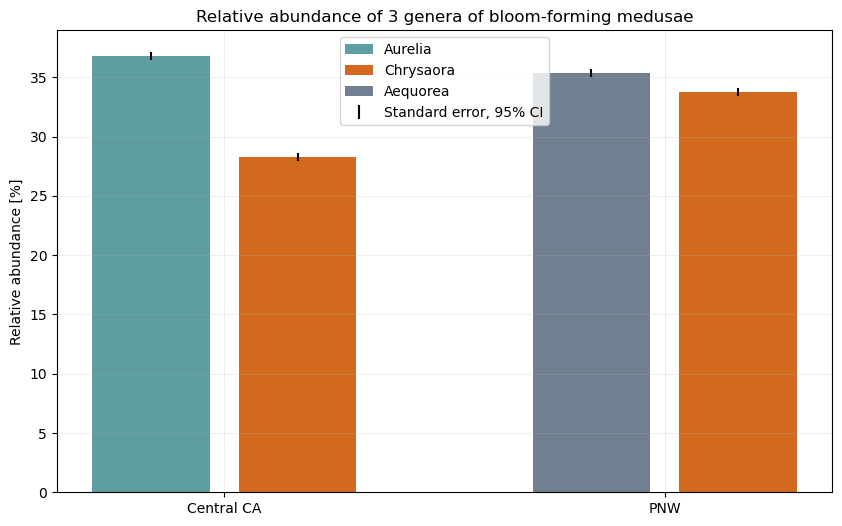

In [18]:
plt.figure(figsize=(10,6))

plt.bar(x_aur, y_aur, label='Aurelia', color='cadetblue')
plt.bar(x_chry, y_chry, label='Chrysaora', color='chocolate')
plt.bar(x_aeq, y_aeq, label='Aequorea', color='slategray')
plt.errorbar([3,2,6,5], relative_abundance, yerr=error, fmt='none', color='k', label='Standard error, 95% CI')
plt.gca().set_xticks([2.5,5.5])
plt.gca().set_xticklabels(['Central CA', 'PNW'])
plt.ylabel('Relative abundance [%]')
plt.grid(linewidth=0.5, alpha=0.3)
plt.legend(loc='upper center')
plt.title('Relative abundance of 3 genera of bloom-forming medusae')
plt.show()

In [19]:
# t test to see if there is a difference in overall jelly abundance between the two regions
region_ttest = stats.ttest_ind(central_ca['abundance'], pnw['abundance'], equal_var=False) 
region_ttest

TtestResult(statistic=-17.304051439830847, pvalue=3.88438927165647e-19, df=36.36362449080731)

The pvalue is less than alpha with a 95% confidence interval, so we rejct the null hypothesis of no difference between the overall region jelly abundances.

In [20]:
# check for normality and equal variances
# normality - use Shapiro-Wilk test
tstat_cachry, pvalue_cachry = stats.shapiro(chrysaora_ca['abundance'])
tstat_aurelia, pvalue_aurelia = stats.shapiro(aurelia['abundance'])
tstat_pnwchry, pvalue_pnwchry = stats.shapiro(chrysaora_pnw['abundance'])
tstat_aequo, pvalue_aequo = stats.shapiro(aequorea['abundance'])

if pvalue_cachry > 0.05:
    print('CA Chrysaora abundance is normally distributed')
else:
    print('CA Chrysaora abundance is NOT normally distributed')
    
if pvalue_aurelia > 0.05:
    print('Aurelia abundance is normally distributed')
else:
    print('Aurelia abundance is NOT normally distributed')
    
if pvalue_pnwchry > 0.05:
    print('PNW Chrysaora abundance is normally distributed')
else:
    print('PNW Chrysaora abundance is NOT normally distributed')
    
if pvalue_aequo > 0.05:
    print('Aequorea abundance is normally distributed')
else:
    print('Aequorea abundance is NOT normally distributed')

# calculate variances
var_ca_chry = np.var(chrysaora_ca['abundance'])
var_aurelia = np.var(aurelia['abundance'])
var_pnw_chry = np.var(chrysaora_pnw['abundance'])
var_aequo = np.var(aequorea['abundance'])
print('CA Chrysaora var:'+str(var_ca_chry))
print('Aurelia var:'+str(var_aurelia))
print('PNW Chrysaora var:'+str(var_pnw_chry))
print('Aequorea var:'+str(var_aequo))

CA Chrysaora abundance is NOT normally distributed
Aurelia abundance is NOT normally distributed
PNW Chrysaora abundance is NOT normally distributed
Aequorea abundance is normally distributed
CA Chrysaora var:0.13218589800633943
Aurelia var:0.124554273804289
PNW Chrysaora var:6.625184653234492
Aequorea var:2.787270697668261


None of the abundance data are normally distributed *except* Aequorea, and the variances are unequal. Therefore I will run a Welch ANOVA (robust to deviations from normality and does not assume equal variance, however, it assumes that sample sizes are approximately equal-- in this case, they almost are: N_ca=26 and N_pnw=17)

In [21]:
# anova
genus_anova, genus_posthoc = fpf.jelly_anova(jellydf)
genus_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,genus,3,36.764356,111.305814,1.675027e-18,0.836648


There is a significant difference between abundances of each genus, so I will now run a non-parametric post-hoc test to find where those difference(s) are.

In [22]:
genus_posthoc

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Aequorea,Aurelia,6.451978,0.224583,6.227395,0.443959,14.026962,2.153833e-14,5.423130
1,Aequorea,Chrysaora CA,6.451978,0.408672,6.043306,0.443959,13.612310,2.153833e-14,5.253068
2,Aequorea,Chrysaora PNW,6.451978,7.167618,-0.715640,0.482634,-1.482780,4.523729e-01,-0.313463
3,Aurelia,Chrysaora CA,0.224583,0.408672,-0.184089,0.401576,-0.458416,9.678016e-01,-0.496229
4,Aurelia,Chrysaora PNW,0.224583,7.167618,-6.943035,0.443959,-15.638915,2.153833e-14,-3.992528
5,Chrysaora CA,Chrysaora PNW,0.408672,7.167618,-6.758946,0.443959,-15.224262,2.153833e-14,-3.883525


In [23]:
file_path2 = '/Users/sarah/Documents/MLML/Current_classes/MS263-Data_Analysis/Final_project/data/BEUTI_monthly.csv'
beutidf = pd.read_csv(file_path2,header=0)
beutidf['date'] = beutidf['month'].astype(str) + '-' + beutidf['year'].astype(str)
beutidf['date'] = pd.to_datetime(beutidf['date'], )
beutidf

/var/folders/9q/f1tj90w176qgctk31mz60mcw0000gn/T/ipykernel_4245/4012382450.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  beutidf['date'] = pd.to_datetime(beutidf['date'], )


,year,month,31N,32N,33N,34N,35N,36N,37N,38N,39N,40N,41N,42N,43N,44N,45N,46N,47N,date
0,1988,1,0.304,0.892,0.614,1.411,3.136,4.947,1.517,0.388,2.160,1.934,-1.992,-2.474,-1.134,-0.892,-0.442,0.460,-4.750,1988-01-01
1,1988,2,0.047,0.453,0.596,0.828,1.358,5.663,3.261,5.043,9.580,10.786,6.864,9.469,6.438,1.393,3.258,1.068,0.225,1988-02-01
2,1988,3,0.882,0.633,0.579,3.321,9.998,11.624,16.402,12.766,25.179,19.528,12.638,10.103,8.930,-1.720,0.762,-0.248,0.658,1988-03-01
3,1988,4,0.635,0.189,0.170,1.346,4.503,3.317,4.471,-1.628,10.962,6.143,3.655,8.970,4.704,-1.430,0.902,-0.327,-1.255,1988-04-01
4,1988,5,1.636,0.754,0.735,5.891,15.041,13.531,15.532,11.123,19.798,12.773,4.003,4.624,2.390,-0.935,0.068,0.056,-0.214,1988-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2023,12,0.171,0.091,0.009,0.144,0.548,0.742,0.301,-0.513,-1.088,-1.687,-3.143,-3.465,-4.050,-1.734,-0.973,-1.331,-0.751,2023-12-01
432,2024,1,0.862,0.486,0.309,0.800,1.222,1.073,-0.133,0.249,-1.757,-2.027,-5.245,-3.506,-5.993,-2.756,-2.231,-3.749,-0.036,2024-01-01
433,2024,2,1.044,0.440,0.272,0.350,0.180,0.365,-0.402,0.319,-0.353,-0.782,-2.398,-3.146,-3.868,-3.327,-0.791,-2.152,-0.493,2024-02-01
434,2024,3,2.649,1.007,1.027,2.424,3.214,3.081,1.466,1.193,2.148,1.397,-0.268,-0.279,-1.201,-1.326,-1.758,-1.036,-0.120,2024-03-01


In [24]:
# subset - only need years 1990-2016 and latitudes 36 and 46? what is best to represent pnw?
ii = ((beutidf['year'] >= 1990) & (beutidf['year'] <= 2016))
beuti_sub = beutidf[ii]
beuti_sub = beuti_sub.iloc[:, [19,0,1,7,17]]
beuti_sub

,date,year,month,36N,46N
24,1990-01-01,1990,1,3.568,-0.821
25,1990-02-01,1990,2,5.526,2.073
26,1990-03-01,1990,3,10.714,1.928
27,1990-04-01,1990,4,8.017,1.710
28,1990-05-01,1990,5,4.836,1.202
...,...,...,...,...,...
343,2016-08-01,2016,8,2.942,0.827
344,2016-09-01,2016,9,2.436,0.713
345,2016-10-01,2016,10,1.251,-0.020
346,2016-11-01,2016,11,1.042,0.000


36N will be used for central ca and 46N for pnw

### Cross correlation of jelly blooms with BEUTI index

Visualize the time series of nitrate flux recorded in the BEUTI index

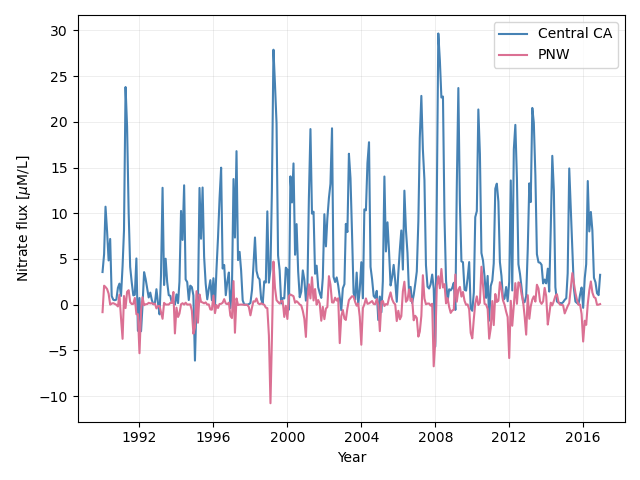

In [47]:
plt.figure()

plt.plot(beuti_sub['date'], beuti_sub['36N'], color='steelblue', label='Central CA')
plt.plot(beuti_sub['date'], beuti_sub['46N'], color='palevioletred', label='PNW')
plt.xlabel('Year')
plt.ylabel('Nitrate flux [$\mu$M/L]')
plt.legend(loc='best')
plt.grid(linewidth=0.5, alpha=0.3)
plt.tight_layout()

In [26]:
date_array = np.array(beuti_sub['date']).flatten()
date_array = date_array.astype(int)

beuti_array_ca = np.array([beuti_sub['36N']]).flatten()
beuti_array_ca = beuti_array_ca.astype(float)

beuti_array_pnw = np.array([beuti_sub['46N']]).flatten()
beuti_array_pnw = beuti_array_pnw.astype(float)

In [40]:
# subset so that jelly and beuti data are equal length
# separate ones for ca and pnw since sample dates are diff

jan_pnw = ((beuti_sub['month']==1) & (beuti_sub['year']>=1999))
beuti_jan_pnw = beuti_sub[jan_pnw]
beuti_jan_pnw = np.array(beuti_jan_pnw.iloc[:,[3]].astype(float)).flatten()

jan_ca = (beuti_sub['month']==1) & (beuti_sub['year']<=2015)
beuti_jan_ca = beuti_sub[jan_ca]
beuti_jan_ca = np.array(beuti_jan_ca.iloc[:,[3]].astype(float)).flatten()

In [41]:
chrysaora_ca_abundance = chrysaora_ca['abundance']
aurelia_abundance = aurelia['abundance']
chrysaora_pnw_abundance = chrysaora_pnw['abundance']
aequorea_abundance = aequorea['abundance']

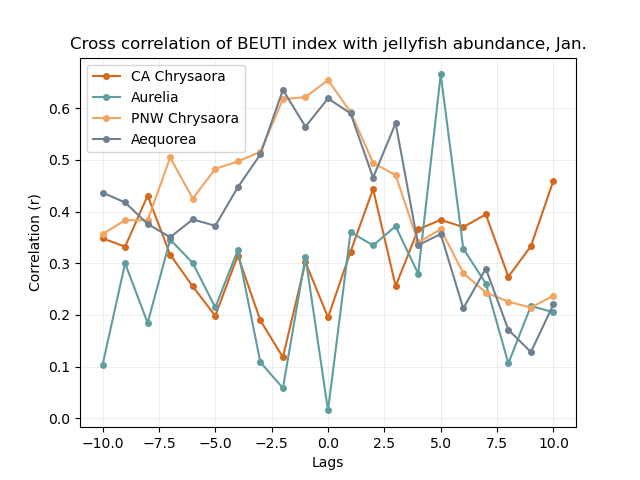

In [46]:
plt.figure()
plt.xcorr(beuti_jan_ca, chrysaora_ca_abundance, usevlines=False, linestyle='-',
         markersize=4, color='chocolate', label='CA Chrysaora')
plt.xcorr(beuti_jan_ca, aurelia_abundance, usevlines=False, linestyle='-',
         markersize=4, color='cadetblue', label='Aurelia')
plt.xcorr(beuti_jan_pnw, chrysaora_pnw_abundance, usevlines=False, linestyle='-',
         markersize=4, color='sandybrown', label='PNW Chrysaora')
plt.xcorr(beuti_jan_pnw, aequorea_abundance, usevlines=False, linestyle='-',
         markersize=4, color='slategray', label='Aequorea')
plt.title('Cross correlation of BEUTI index with jellyfish abundance, Jan.')
plt.xlabel('Lags')
plt.ylabel('Correlation (r)')
plt.legend(loc='best')
plt.grid(linewidth=0.5, alpha=0.3)
plt.show()

Jan. - r = 0.6 for PNW Chry. and Aequor at 1 lag (5 months after Jan. upwelling winds), Aurelia r=0.66 at 5 lags (25 months???), CA Chry. r=0.44 at 2 lags (10 months?)

Dec. - r=0.63 at 6 lags (30 months??) for CA Chry., at 0 lags Aequor r=0.62

should i make this into subplots?? would it be easier to see?

is there a benefit to doing multiple months and comparing correlations??

t test for cross correlation?? (how to determine stat significance??)

do i need to do any pre-whitening or de trending???

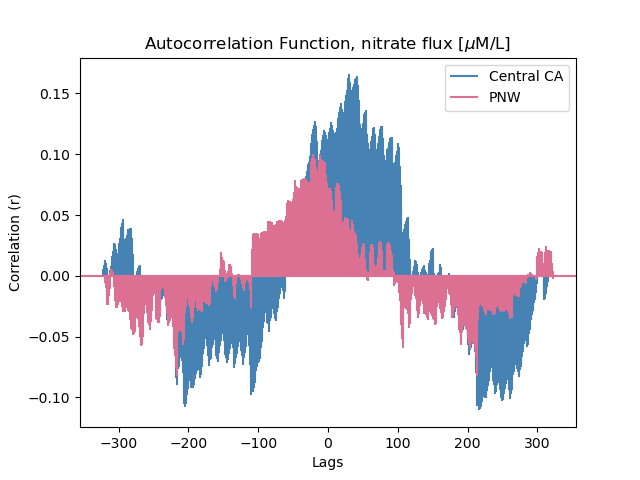

In [44]:
# don't think i need this but keeping for now just in case
# what are the variables that the plot is being set = to????

plt.figure()
lags,r,_,_ = plt.xcorr(date_array,beuti_array_ca,detrend=mlab.detrend,maxlags=None, color='steelblue', label='Central CA')
lags,r,_,_ = plt.xcorr(date_array,beuti_array_pnw,detrend=mlab.detrend,maxlags=None, color='palevioletred', label='PNW')
plt.legend(loc='best')
plt.xlabel('Lags')
plt.ylabel('Correlation (r)')
plt.title('Autocorrelation Function, nitrate flux [$\mu$M/L]')
plt.show()

- PNW - first crosses 0 at 56 lags
- CA - first crosses 0 at 119 lags

1 lag = sampling interval

In this case a lag is 1 month b/c samples are taken every month??

Autocorr notebook from class -> 1-in-class-ooi-adcp-analysis (Lab 9)

Need to read more about this, i don't understand

In [31]:
# don't think i need this but keeping for now just in case
# tstar_lags_ca = 119
# tstar_lags_pnw = 56

# delta_t_yrs = 0.0833

# t_star_ca = tstar_lags_ca*delta_t_yrs
# t_star_pnw = tstar_lags_pnw*delta_t_yrs

# print(t_star_ca)
# print(t_star_pnw)